<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
 <h2>Mentoría: Detección de objetos en imágenes </h2>
</center>



Esta es una notebook autocontenida para el análisis de datos de la tabla de características de las carpetas de las imágenes del repositorio [Deuba](https://gitlab.com/ciiiutnfrc/deuba) propuesto para la mentoría *'Detección de objetos en imágenes'*.

Para detalles como se encontró la tabla que vamos a utilizar, revisen la notebook [0_DetecciónObjetos_ArmandoLaTabla.ipynb](0_DetecciónObjetos_ArmandoLaTabla.ipynb)


<a name="exploratory_data_analysis"></a>
## **Consignas para la materia  Introducción al Aprendisaje Automático**

### 1 General 
*FECHA LíMITE DE ENTREGA: 15/08*

Realizar un informe en formato notebook, en la cual se presenten los resultados del análisis realizado. El mismo debe estar pensado para un público técnico pero que desconoce los aspectos propios del problema a resolver (por ejemplo, sus compañer@s de clase).

Se evaluará principalmente la claridad del mensaje presentado, el uso de las herramientas y los conceptos desarrollados durante las clases de la materia " Introducción al Aprendisaje Automático". Asimismo, el mismo debe incluir de manera clara los hallazgos y problemas encontrados y las posibles accionar a tomar.

Se aconseja que el informe tenga una estructura ordenada, clara y fácil de leer. Por ejemplo, podría contar con una introducción a la problemática a resolver, una descripción de los datos a emplear, el desarrollo propiamente dicho de todo el trabajo y las conclusiones que se obtuvieron.



### 2 Consignas de Aprendisaje Automático

Presentar en un archivo jupyter notebook con la resolución detallada de las siguientes consignas:

##### Preparando el dataSet:

Teniendo en cuenta los resultados de las entregas anteriores en cuanto al desbalance del dataSet o al posible sesgo, proponer una nueva separación (80/20) entre train test del dataset original .

  1- Recordar que en nuestro caso podemos realizar clasificación binaria (ccb y csb) . Por lo cual se pueden descartar aquellas columnas categóricas que no sumen al problema y definir como 'target' nuesta columna de interés.

 
  2- De las variables/características/features numéricas que hayan encontrado en notebooks anteriores, elegir como mucho las 5 mas representativas para:

##### Regresión:

 * Hacer una gráfica que muestre su relación con la variable objetivo.
 * Instanciar una regresión lineal de scikit-learn, y entrenarla usando sólo el atributo seleccionado.
 * Calcular el error cuadrático medio para los conjuntos de entrenamiento y evaluación y grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación. 
 * Interpretar el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.  
    
 * Tomar pares de características y considerar una como regresora y la otra como objetivo o variable/característica a predecir y realizar una regresión lineal y varias polinomiales (hasta grado 5) para evaluar el grado del polinomio que mejor se ajusta a las predicciones. 
    
 * Luego realizar la búsqueda de los mejores hiperparámetros utilizando GridSearchCV en el conjunto Train, con RMSE o análoga como medida de calidad de ajuste.
 * Una vez definidos los hiperparámetros (encontrados en la búsqueda del item anterior. Evaluar el modelo ajustado utilizando el conjunto Test, con la medida (o las medidas) que crea adecuada.
 
###### Posibles variables objetivos:
 * Las variables con los canales de los colores
 * Los tamaños de los objetos


  ##### Clasificación:
   Seleccionar de a pares de características en el conjunto Train para clasificación binaria: csb -ccb.   
   Primero con los hiperparámetros por defecto y luego ir cambiándolos un poco implementar los algoritmos de (del paquete sklearn):
   * Perceptrón, 
   * SGD 
   * Árboles de Decisión 

   Utilizar GridSearchCV para explorar las diferentes combinaciones de hiperparámetros. Realizar las gráficas correspondientes de ROC, PR y las de froteras de desición. 
   
   * ¿Puedo determinar el video que originó la imagen? Aplicar clasificación multiclase. 
   * Realizar una represtanción matricial con los resultados: Matriz de confusión.
    
   


### 3 Corriendo la Notebook

Clonar el donde están las imágenes y luego moverse entre las carpetas. 

In [1]:
# acá vamos importando las librerías necesarias 
# y a medida que van surgiendo por necesidad, las van sumando, para mantener un orden y poder ubicarlas rápido
from IPython.display import Image as Imge
import pandas as pd
import numpy as np
import glob

#seguimos agregando librerías necesarias:
#las que no tengan, vayan instalándolas
import cv2
import numpy as np

import matplotlib.pyplot as plt
import PIL
from PIL import Image
from os import path
import os

#from google.colab.patches import cv2_imshow #en Colab!

import seaborn as sns

from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import math
from sklearn.metrics import make_scorer



Agregue unas lineas para bajar copiar el dataSet desde el repo directamente: 

In [ ]:
!noglob wget https://gitlab.com/diegobcuadro/mentoria-deteccion-de-objetos-en-imagenes/-/archive/master/mentoria-deteccion-de-objetos-en-imagenes-master.tar.gz?path=dataset -O dataset.tar.gz

/bin/bash: noglob: command not found


Luego hay que descomprimir el archivo tar.gz y movernos al directorio: 

In [ ]:
#os.chdir('/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/')
!tar xvzf dataset.tar.gz 
os.chdir('mentoria-deteccion-de-objetos-en-imagenes-master-dataset/dataset/')
!ls 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/My Drive/Mentoria_Img/mentoria-deteccion-de-objetos-en-imagenes/dataset')

Aprendizaje automático - Regresión
En este trabajo se pretente entrenar un modelo de regresión lineal (y su extensión polinomial) que permita predecir una variable numérica (variable independiente) a partir de una o dos variables dependientes númericas. Para esto, se utilizarán los variables presentes en los datasets Train y Test previamente suminitrados en la mentoría Detección de objetos en imágenes

In [4]:
# Se importan los datasets Train y Test 
dataset_train = pd.read_csv('dataSet_train_crop_features_labels.csv', low_memory=False)
dataset_train = dataset_train.drop(['Unnamed: 0'], axis=1)
dataset_test = pd.read_csv('dataSet_test_crop_features_labels.csv', low_memory=False)
dataset_test = dataset_test.drop(['Unnamed: 0'], axis=1)


In [38]:
# Observamos las variables presentes en el dataset Train
dataset_train.sample(5)

filename  width  ...      2046      2047
589  Video2-frame-000007_single_box_0.jpg    640  ...  1.100216  0.018567
887  Video3-frame-000110_single_box_4.jpg    640  ...  0.552477  0.099569
588  Video2-frame-000006_single_box_1.jpg    640  ...  0.285480  0.411980
622  Video2-frame-000024_single_box_0.jpg    640  ...  0.567411  0.104007
183  Video1-frame-000344_single_box_1.jpg    640  ...  0.690833  0.000000

[5 rows x 2063 columns]

In [39]:
# Observamos las variables presentes en el dataset Train
dataset_test.sample(5)

filename  width  ...      2046      2047
266  Video3-frame-000716_single_box_0.jpg    640  ...  0.152063  0.093797
312  Video8-frame-001486_single_box_0.jpg    400  ...  0.402584  0.012185
432  video5-frame-000520_single_box_0.jpg   1080  ...  0.022280  0.178846
182  Video2-frame-000213_single_box_0.jpg    640  ...  0.658759  0.115562
246  Video3-frame-000288_single_box_1.jpg    640  ...  0.544450  0.048779

[5 rows x 2063 columns]

In [7]:
# Primeras 20 columnas del dataset Train
dataset_train.columns[:20]

Index(['filename', 'width', 'height', 'clase', 'xmin', 'xmax', 'ymin', 'ymax',
       'use', 'videoname', 'bb_width', 'bb_height', 'ch_R', 'ch_G', 'ch_B',
       '0', '1', '2', '3', '4'],
      dtype='object')

In [45]:
# Seleccionamos 5 variables de interés para los dataset Train y Test 
# ch_R = canal de color rojo
# ch_G = canal de color verde
# ch_B = canal de color azul
# 0 = primer componente obtenido a partir de la aplicación de Resnet10 a las imágenes
# 1 = segundo componente obtenido a partir de la aplicación de Resnet10 a las imágenes
dataset_train_red = dataset_train[['ch_R', 'ch_G', 'ch_B','0', '1']]
dataset_test_red = dataset_test[['ch_R', 'ch_G', 'ch_B','0', '1']]

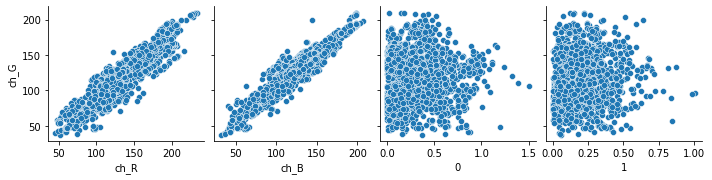

In [46]:
# Observamos como es la relación entre las variables dependientes y la variable independiente seleccionada, en este caso color de canal verde (ch_G)
sns.pairplot(dataset_train_red, x_vars=["ch_R", "ch_B", "0","1"], y_vars=["ch_G"])

In [47]:
# Separamos la variable independiente y las dependientes en los datasets Train y Test
train_Y = dataset_train[['ch_G']]
test_Y = dataset_test[['ch_G']]
dataset_train_reg = dataset_train[['ch_R', 'ch_B', '0', '1']]
dataset_test_reg = dataset_test[['ch_R', 'ch_B', '0', '1']]

In [48]:
# Dentro del dataset Train separamos 80/20 los datos de entranamiento y validación, respectivamente.
# Esta separación será útil para entrenar el modelo de regresión 
X, Y = dataset_train_reg, train_Y
X_train, X_val, y_train, y_val = train_test_split(X, Y, train_size=0.8, random_state=0)
X_train.shape, X_val.shape

((1530, 4), (383, 4))

In [49]:
# Tomamos como variable dependiente al color de canal rojo (ch_R) ya que observamos en los gráficos de dispersión que podría tener una relación lineal con ch_G 
X_train_red = X_train[['ch_R']]
X_val_red = X_val[['ch_R']]

X_train_red.shape, X_val_red.shape

((1530, 1), (383, 1))

In [58]:
# Instanciamos la regresión lineal
degree = 1
pol_feature = PolynomialFeatures(degree)
linreg = LinearRegression(fit_intercept=False) 
model = make_pipeline(pol_feature, linreg)
# Ajustamos el modelo con nuestros datos de entrenamiento
model.fit(X_train_red, y_train)
print('Se ajustó una regresión lineal con los siguientes parámetros.')

print(linreg.coef_)

Se ajustó una regresión lineal con los siguientes parámetros.
[[2.89266028 0.84906261]]


In [59]:
# Se calculó la raíz del error cuadrático medio, tanto en el set de entranamiento como en el de validación
y_train_pred = model.predict(X_train_red)
y_val_pred = model.predict(X_val_red)

train_RMSerror = math.sqrt(mean_squared_error(y_train, y_train_pred))
val_RMSerror = math.sqrt(mean_squared_error(y_val, y_val_pred))
print(f'RMSE Train: {train_RMSerror:f}')
print(f'RMSE Val: {val_RMSerror:f}')


RMSE Train: 13.583171
RMSE Val: 13.787080


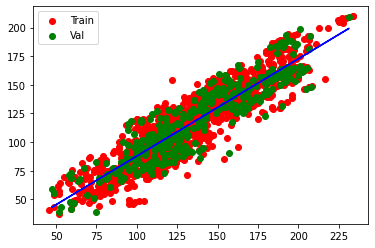

In [61]:
# Se grafican los puntos de entrenamiento y evaluación, junto con el modelo obtenido (línea azul)
plt.scatter(X_train_red, y_train, facecolor="red", label="Train")
plt.scatter(X_val_red, y_val, facecolor="green", label="Val")
plt.plot(X_val_red, y_val_pred, color="blue")

plt.legend()


En base al gráfico observado y a los valores de RMSE train y val, podemos decir que obtuvimos un buen ajuste del modelo para ch_G en función de ch_R

In [62]:
# Luego, entrenamos un modelo de regresión lineal pero en este caso utilizando el segundo componente obtenido a partir de ResNet10 
X_train_1 = X_train[['1']]
X_val_1 = X_val[['1']]

X_train_1.shape, X_val_1.shape

((1530, 1), (383, 1))

### <font color='red'> conviene que los comentarios esten en formato markdown en lugar de comentarios del código</font>

In [63]:
degree = 1
pol_feature = PolynomialFeatures(degree)
linreg2 = LinearRegression(fit_intercept=False) 
model2 = make_pipeline(pol_feature, linreg2)

model2.fit(X_train_1, y_train)
print('Se ajustó una regresión lineal con los siguientes parámetros.')

print(linreg2.coef_)

Se ajustó una regresión lineal con los siguientes parámetros.
[[112.50645496  16.87428067]]


In [64]:
# Se calcula los RMSE para entrenamiento y validación y se grafica el modelo
y_train_pred1 = model2.predict(X_train_1)
y_val_pred1 = model2.predict(X_val_1)

train_RMSerror = math.sqrt(mean_squared_error(y_train, y_train_pred1))
val_RMSerror = math.sqrt(mean_squared_error(y_val, y_val_pred1))
print(f'RMSE Train: {train_RMSerror:f}')
print(f'RMSE Val: {val_RMSerror:f}')

RMSE Train: 32.934953
RMSE Val: 32.912842


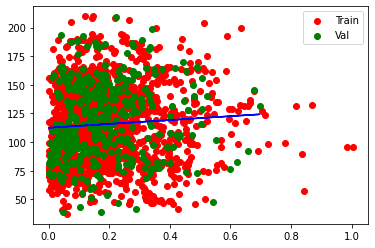

In [65]:
plt.scatter(X_train_1, y_train, facecolor="red", label="Train")
plt.scatter(X_val_1, y_val, facecolor="green", label="Val")
plt.plot(X_val_1, y_val_pred1, color="blue")

plt.legend()

Como conclusión parcial, podemos notar que el modelo entrenado con el segundo componente de Resnet10 no ajusta adecuadamente a ch_G en comparación a cuando se utiliza a ch_R 

In [93]:
# El próximo paso es entrenar un modelo que represente relaciones no lineales entre las variables, esto lo hacemos entrenando regresiones polinomialea (hasta grado 5)
# Comenzamos con la variable dependiente ch_R

train_errors = []
val_errors = []
max_polynom = 6

degrees =  list(range(1,max_polynom))
for degree in degrees:
    pol_feature = PolynomialFeatures(degree)
    linreg = LinearRegression(fit_intercept=False)
    model = make_pipeline(pol_feature, linreg)
    model.fit(X_train_red, y_train)
# Se predicen los valores para entrenamiento y validación
    y_train_pred = model.predict(X_train_red)
    y_val_pred = model.predict(X_val_red)
# Se calculan los valores RMSE:
    train_error = math.sqrt(mean_squared_error(y_train, y_train_pred))
    val_error = math.sqrt(mean_squared_error(y_val, y_val_pred))

    print(f'Polinomio de grado {degree}')
    print('train_error:',train_error)
    print('val_error:',val_error,'\n')

    train_errors.append(train_error)
    val_errors.append(val_error)
    

Polinomio de grado 1
train_error: 13.583171297105764
val_error: 13.787079793043143 

Polinomio de grado 2
train_error: 13.570608903194197
val_error: 13.796715572856852 

Polinomio de grado 3
train_error: 13.526257347578051
val_error: 13.759840347858802 

Polinomio de grado 4
train_error: 13.419004675714516
val_error: 13.756172027668697 

Polinomio de grado 5
train_error: 13.381856918753034
val_error: 13.720781489028886 



Text(0.5, 0, 'degree')

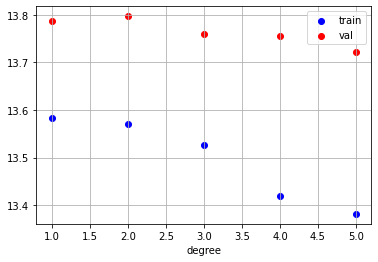

In [94]:
# Se grafican los errores para cada polinomio en entrenamiento y validación

ax = plt.gca()
ax.scatter(degrees, train_errors, color="blue", label="train")
ax.scatter(degrees, val_errors, color="red", label="val")
plt.grid()
plt.legend()
plt.xlabel("degree")


In [97]:
# Para el caso de la varable Resnet 1
train_errors_2 = []
val_errors_2 = []
max_polynom_2 = 6

degrees_2 =  list(range(1,max_polynom_2))

for degree in degrees_2:
    pol_feature_2 = PolynomialFeatures(degree)
    linreg_2 = LinearRegression(fit_intercept=False)
    model_2 = make_pipeline(pol_feature_2, linreg_2)
    model_2.fit(X_train_1, y_train)

    y_train_pred_2 = model_2.predict(X_train_1)
    y_val_pred_2 = model_2.predict(X_val_1)
    
    train_error_2 = math.sqrt(mean_squared_error(y_train, y_train_pred_2))
    val_error_2 = math.sqrt(mean_squared_error(y_val, y_val_pred_2))

    print(f'Polinomio de grado {degree}')
    print('train_error:',train_error_2)
    print('val_error:',val_error_2,'\n')
    
    train_errors_2.append(train_error)
    val_errors_2.append(val_error)

Polinomio de grado 1
train_error: 32.934952651217266
val_error: 32.91284219180273 

Polinomio de grado 2
train_error: 32.741651442464295
val_error: 32.49169422182282 

Polinomio de grado 3
train_error: 32.59735327614752
val_error: 32.245066920201005 

Polinomio de grado 4
train_error: 32.326679248543115
val_error: 32.28672792228867 

Polinomio de grado 5
train_error: 32.27983783367956
val_error: 32.35740355935688 



Text(0.5, 0, 'degree')

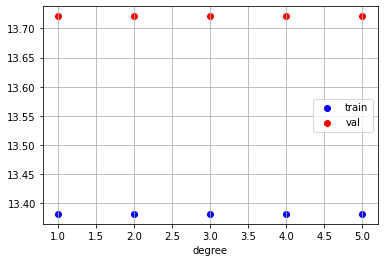

In [98]:
# Se grafican los errores para cada polinomio en entrenamiento y validación

ax = plt.gca()
ax.scatter(degrees_2, train_errors_2, color="blue", label="train")
ax.scatter(degrees_2, val_errors_2, color="red", label="val")
plt.grid()
plt.legend()
plt.xlabel("degree")

El ajuste de regresiones polinomiales, al menos hasta grado 5, no parece tener influencia sobre un mejor ajuste de los modelos, tanto para la variable ch_R como "1"

In [99]:
# Ahora consideramos una regresión lineal utilizando dos variables dependientes ch_R y ch_B
X_train_red1 = X_train[['ch_R', 'ch_B']]
X_val_red1 = X_val[['ch_R', 'ch_B']]

X_train_red1.shape, X_val_red1.shape

((1530, 2), (383, 2))

In [102]:
# Instanciamos regresione polinomiales (hasta grado 10) utilizando las dos variables

train_errors_3 = []
val_errors_3 = []
max_polynom_3 = 11

degrees_3 = list(range(1,max_polynom_3))
for degree in degrees_3:
    pol_feature_3 = PolynomialFeatures(degree)
    linreg_3 = LinearRegression(fit_intercept=False)
    model_3 = make_pipeline(pol_feature_3, linreg_3)
    model_3.fit(X_train_red1, y_train)
    
    y_train_pred_3 = model_3.predict(X_train_red1)
    y_val_pred_3 = model_3.predict(X_val_red1)
    
    train_error_3 = math.sqrt(mean_squared_error(y_train, y_train_pred_3))
    val_error_3 = math.sqrt(mean_squared_error(y_val, y_val_pred_3))
    
    print(f'Polinomio de grado {degree}')
    print('train_error:',train_error_3)
    print('val_error:',val_error_3,'\n')
    
    train_errors_3.append(train_error_3)
    val_errors_3.append(val_error_3)

Polinomio de grado 1
train_error: 6.185231912004908
val_error: 5.989452008610201 

Polinomio de grado 2
train_error: 6.125720853707539
val_error: 5.963223685636968 

Polinomio de grado 3
train_error: 6.039634186362306
val_error: 5.878626337942948 

Polinomio de grado 4
train_error: 5.926785792892581
val_error: 5.7462418446840475 

Polinomio de grado 5
train_error: 5.825103844018763
val_error: 5.578767547690605 

Polinomio de grado 6
train_error: 5.7916214411769324
val_error: 5.537523629918655 

Polinomio de grado 7
train_error: 5.7382371708456
val_error: 5.5145101470095685 

Polinomio de grado 8
train_error: 6.447646819936517
val_error: 7.767843332868456 

Polinomio de grado 9
train_error: 60.26190394106067
val_error: 66.27502093717328 

Polinomio de grado 10
train_error: 22.406534421031743
val_error: 22.936056073322874 



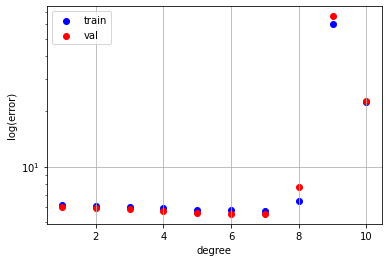

In [103]:
ax = plt.gca()
ax.scatter(degrees_3, train_errors_3, color="blue", label="train")
ax.scatter(degrees_3, val_errors_3, color="red", label="val")
plt.grid()
plt.legend()
plt.xlabel("degree")
plt.ylabel("log(error)")
ax.set_yscale('log')

Utilizando dos variables regresoras en conjunto mejora el ajuste del modelo

In [114]:
# Para determinar de manera analítica cual es el grado de polinomia que mejor resultados produce, junto a otros hiperparámetros de la regresión lineal, realizamos una búsqueda con el método GridSearchCV 
max_polynom_2 = 11

pipe = Pipeline([('pnf', PolynomialFeatures()),
                     ('lre', LinearRegression())])
params = [{'pnf__degree': list(range(1,max_polynom_2)),
         'lre__fit_intercept': [True, False],
         'lre__normalize': [True, False]}]
grid = GridSearchCV(pipe, param_grid=params,scoring = 'neg_root_mean_squared_error' , cv=5)

grid.fit(X_train_red1, y_train)

print('Los hiperparámetros que producen un mejor ajuste son:')
grid.best_params_

Los hiperparámetros que producen un mejor ajuste son:


{'lre__fit_intercept': True, 'lre__normalize': False, 'pnf__degree': 5}

In [115]:
# Ajustamos el mejor modelo a los datos de entrenamiento
pol_feature_best = PolynomialFeatures(degree = 5)
linreg_best = LinearRegression(fit_intercept = True, normalize = False)
model_best = make_pipeline(pol_feature, linreg_best)
model_best.fit(X_train_red1, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=5, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [116]:
# Preparamos el dataset de Test
X_test_red = dataset_test_reg[['ch_R', 'ch_B']]

X_test_red.shape

(495, 2)

In [117]:
# Predecimos los valores de ch_G para los datasets de entrenamiento, validación y test utilizando el mejor modelo
y_train_best = model_best.predict(X_train_red1)
y_val_best = model_best.predict(X_val_red1)
y_test_best = model_best.predict(X_test_red)

In [120]:
# Calculamos los RMSEs para los datasets de entrenamiento, validación y test
train_error_best = math.sqrt(mean_squared_error(y_train, y_train_best))
val_error_best = math.sqrt(mean_squared_error(y_val, y_val_best))
test_error_best = math.sqrt(mean_squared_error(test_Y, y_test_best))

In [121]:
print(f'Polinomio de grado {4}')
print('train_error:',train_error_best)
print('val_error:',val_error_best,'\n')
print('test_error:',test_error_best,'\n')

Polinomio de grado 4
train_error: 5.825103843948845
val_error: 5.5787708305498205 

test_error: 6.2858706289773805 



 ### <font color='red'> Correcciones:</font>
 * Faltaría analizar los hiperparámetros de regularización: como L1, L2, etc. 
 * Faltarían las conclusiones sobre regresión.
 * Para una mejor presentación y lectura de la entrega conviene que los comentarios esten en formato texto (markdown) en lugar de comentarios de código.